### Reason behind the name

1.	K stands for the number of clusters. At the end of analysis we will be fiding the optimal value of K
2.	Means - calculation of cluster centroid is based on the average of coordinates

### Steps behind K-Means Clustering

1.	Randomly assign a number from 1 to K to each of the observations. Now we have initialized K clusters.
2.	Calculate centroid for each cluster
3.	Calculate distance between the centroid of each cluster to all the observations in the data
4.	Reassign the cluster label of an observation to cluster label of the closest centroid
5.	Repeat steps 2 to 4 until the cluster assignments stop changing

#### Explanation with example

##### import packages

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import seaborn as sb, pandas as pd, numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

##### create sample data

creating sample data so that it is easier to understand the steps involved in crearion and validation of clustering 

In [2]:
X, y = make_blobs(n_samples=150, n_features=3, centers=5, 
                  cluster_std=0.5, shuffle=True, random_state=0)

##### colors for different cluster samples

In [10]:
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'orange'}

##### visualize the sample data created

<IPython.core.display.Javascript object>


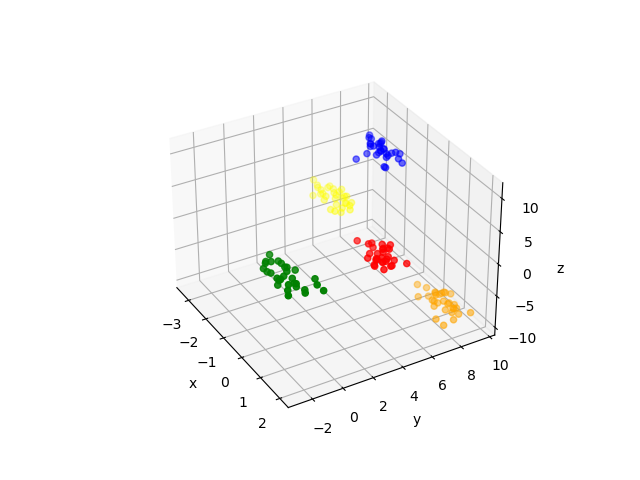

In [55]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=pd.Series(y).map(colors))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

##### clustering

In unsupervised learning we don't know the optimal number of clusters to be created initially. So, we run Kmeans for different values of K and decide the optimal value of K based on Inertia and silhouette value which we will see later in this notebook. Here we run clustering for K value from 2 to 20

In [120]:
inetria = []
silhouette = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    km = kmeans.fit(X)
    cluster_labels = kmeans.fit_predict(X)
    inetria.append(km.inertia_)
    '''The silhouette_score gives the average value for all the samples.
    This gives a perspective into the density and separation of the formed clusters'''
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette.append(silhouette_avg)

### How to decide the optimal value of K

#### Inertia/Distortion Analysis

1.	Inertia is the sum of squared distances between the data points in a cluster and the cluster's centroid
2.	Closeness of data points in a cluster is measured by Inertia.
3.	lesser the value of Inertia, higher the closeness of data points in a cluster
4.	Inertia can be termed as intra cluster closeness

##### Elbow method

1.	Plotting the inertia for different values of K (number of clusters) helps in deciding the optimal value of K
2.	Based on the inertia definition above, the value of Inertia will be high for K equal to 1 (i.e. single cluster) and zero for K equal to n (number of observation in the data)
3.	With increase in K from 1 to n, the value of Inertia decreases drastically in the beginning and decreases slowly after certain value of K. The value of K after which the Inertia decreases slowly is the optimal value of K
4.	Here, in the plot, elbow is located at K=5

In [123]:
from kneed import KneeLocator
kn = KneeLocator(x=list(range(2,len(inetria)+2)), y=inetria, curve='convex', direction='decreasing')

In [134]:
pt_clrs = list(map(lambda x: {0:'#2596be', 1:'#e28743'}[x], 
                    (list(range(2,len(inetria)+2)) == kn.knee).astype(int)))

In [158]:
fig = px.line(x=list(range(2,len(inetria)+2)), y=inetria, text=[round(vl,2) for vl in inetria],
            labels = dict(x='Number of clusters', y='Inertia'))
fig.update_traces(textposition='top right')
#                  , marker = dict(color = pt_clrs))
fig.add_trace(go.Scatter(x=[kn.knee] * 2, y=[-1, mt.ceil(max(inetria))],
                         line = dict(color='firebrick', width=2, dash='dot'),
                    mode='lines'))
fig.update_layout(
    xaxis = dict(tickvals = list(range(2,len(inetria)+2))),
    showlegend=False)
fig.show()

#### Silhouette Analysis

1.	Silhouette is a measure of how closely packed the samples in the clusters are
2.	Silhouette is calculated as (cluster separation - cluster cohesion) / max (cluster cohesion, cluster separation)
3.	Cluster cohesion is the average distance between a data point and all other data points in the same cluster. Lesser the cohesion value tightly packed the samples in the cluster
4.	Cluster separation is the average distance between a data point in a cluster and all data points in the nearest cluster. Higher the separation value higher the difference between the clusters
5.	From the definitions of Cluster cohesion and Cluster separation, we can understand that, for a good clustering result, the cohesion value should be lower and separation value should be higher (i.e. Silhouette coefficient being positive)
6.	Silhouette coefficient lies in the range of -1 to 1.  Higher the silhouette score better is the clustering

For the example data taken, Silhouette coefficient is higher for K = 5

In [88]:
bar_clrs = list(map(lambda x: {0:'#2596be', 1:'#e28743'}[x], (silhouette == max(silhouette)).astype(int)))

In [89]:
fig = px.bar(x=list(range(2,20)), y=silhouette, text=[round(vl,2) for vl in silhouette],
            labels = dict(x='Number of clusters', y='silhouette score'))
fig.update_traces(textposition='outside'
                  ,marker = dict(color = bar_clrs)
                 )
fig.update_layout(
    xaxis = dict(tickvals = list(range(2,20))))
fig.show()

### Disadvantages

1.	bad clustering or slow convergence If the initial centroids are chosen poorly

### Alternate method

K-means++